### Joint Distributions Example 5.1
For each of the 50 states in the United States, the data set contains the number of arrests per 100'000 residents for each of three crimes : **Assault}, **Murder} and **Rape**. 

For instance, consider the figure below, which shows the number of arrests for **Assault** in tens versus the number of arrests for **Murder** for each of the 50 states in the United States. The green solid line represents the *first principal component direction* of the data. We can see by eye that this is the direction along which there is the greatest variability in the data. That is, if we *projected* the 50 observations onto this line, then the resulting projected observations would have the largest possible variance; projecting the observations onto any other line direction would yield projected observations with lower variance.
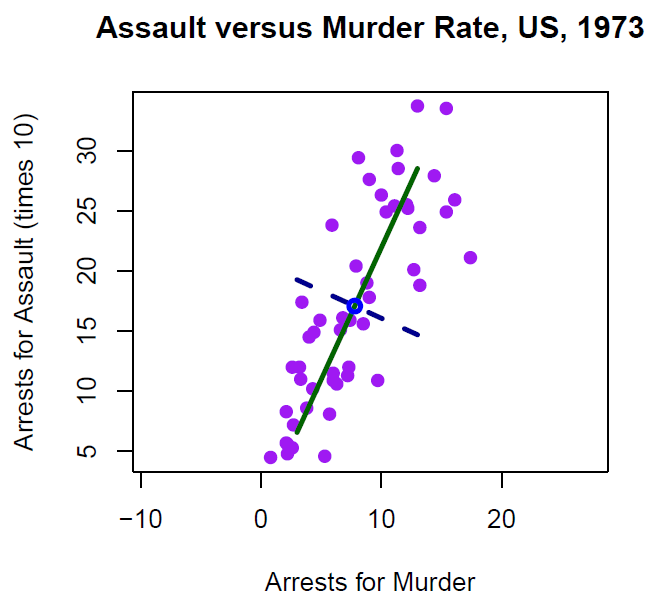

The first principal component direction is displayed graphically in the figure, but how can it be summarized mathematically? If we consider the first principal component direction as a coordinate axis, then any point $(Murder, Assault)$ has the following first principal component coordinate when projected onto this line 

\begin{equation}
Z_1=-0.0419126\cdot\left(Murder-\overline{Murder}\right)-0.9991213\cdot\left(Assault-\overline{Assault}\right)
\end{equation}

where $\overline{Murder}$ indicates the mean of all **Murder** values in this data set, and $\overline{Assault}$ indicates the mean of all arrests for assault. Thus, the point $(\overline{Murder},\overline{Assault})$ corresponds to the origin on the first prinicipal component axis.

Here $\phi_{11}=-0.0419126$ and $\phi_{21}=-0.9991213$ are the *prinicipal component loadings* which define the direction to the above. How can these values be found? The idea is that out of every possible linear combination of $Murder$ and $Assault$ such that $\phi_{11}^2+\phi_{21}^2=1$, this particular linear combination yields the highest variance: i.e. this is the linear combination for which

\begin{equation}
Var \left(\phi_{11}\cdot(Murder-\overline{Murder})+\phi_{21}\cdot(Assault-\overline{Assault})\right)
\end{equation}

is *maximized*. It is necessary to consider only linear combinations of the form $\phi_{11}^2+\phi_{21}^2=1$, since otherwise we could increase $\phi_{11}$ and $\phi_{21}$ arbitrarily in order to blow up the variance. 

We determine the first principal component loadings in **Python** as follows:

In [1]:
import pandas as pd
from sklearn.decomposition import PCA

# Read Data
arrests = pd.read_csv('./data/USArrests.csv')
states = arrests.iloc[:,0]
features = ['Murder', 'Assault']
# keep only arrests on Murder and Assault
arrests = arrests.loc[:, features]

# Create PCA instance and fit the data
pca = PCA()
pca.fit(arrests)

# Print the first principal componentn loadings:
print("First PCL's: \t", features, "\n\t\t", pca.components_[0])       

First PCL's: 	 ['Murder', 'Assault'] 
		 [0.0419126  0.99912128]


By default, the **sklearn.decomposition.PCA()** function centers the variables to have mean zero. This corresponds to how we defined the first principal component.

Since $n=50$, $Murder$ and $Arrest$ are vectors of length $50$, and so is $Z_1$ in the first equation. For instance,

\begin{equation}
z_{i1}=-0.0419126\cdot\left(Murder_{i}-\overline{Murder}\right)-0.9991213\cdot\left(Assault_{i}-\overline{Assault}\right)
\end{equation}

The values of $z_{i1},\ldots,z_{n1}$ are known as the *principal component scores*. We can compute them in **Python** in the following way:

In [2]:
# Find Principle component scores:
principalComponents = pca.fit_transform(arrests)
# Turn into DataFrame
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['PC1', 'PC2'], index = states)
# print results:
print("Number of Principle component scores:\n", 
      len(principalComponents[:,0]))
print(principalDf.head())

Number of Principle component scores:
 50
                   PC1       PC2
Unnamed: 0                      
Alabama      65.409503  2.672866
Alaska       92.251658 -1.655962
Arizona     123.144783 -4.853583
Arkansas     19.265509  0.204712
California  105.198322 -3.199947


The first column contains the values $z_{i1}$, the second column the values $z_{i2}$.

We can think of the values of the principal component $Z_1$ as single-number summaries of the joint $Murder$ and $Assault$ arrests for each state. In this 
example, if 
\begin{equation}
z_{i1}=-0.0419126\cdot\left(Murder_{i}-\overline{Murder}\right)-0.9991213\cdot\left(Assault_{i}-\overline{Assault}\right)>0
\end{equation}

then this indicates a state with below-average arrests for murder and below-average arrests for assault. A negative score suggests the opposite. How well can a single number represent both $Murder$ and $Assault$? In this case, the figure indicates that $Murder$ and $Assault$ have approximately a linear relationship, 
and so we might expect that a single-number summary will work well. 

So far we have concentrated on the first principal component. In general, one can construct up to $p$ distinct principal components. The second principal component $Z_{2}$ is a linear combination of predictor variables and is uncorrelated with $Z_1$, and has largest variance subject to this constraint. The second principal component direction is illustrated as a dashed blue line in the figure.

It turns out that the zero correlation condition of $Z_1$ with $Z_2$ is equivalent to the condition that the direction must be *perpendicular*, or *orthogonal* 
to the first principal component direction. The second principal component is given by the formula

\begin{equation}
Z_2=0.9991213\cdot\left(Murder-\overline{Murder}\right)-0.0419126\cdot\left(Assault-\overline{Assault}\right)
\end{equation}


We compute the second principal component loadings in **Python** as follows:

In [3]:
print("Second PCL's: \t", features, "\n\t\t", pca.components_[1])       

Second PCL's: 	 ['Murder', 'Assault'] 
		 [ 0.99912128 -0.0419126 ]


Again, any point $(Murder_{i},Assault_{i})$ projected onto the second principal component direction yields the second principal component coordinate $z_{i2}$. 

The point $(\overline{Murder},\overline{Assault})$ corresponds again to the origin of the second principal component axis and hence to the origin of the new coordinate system defined by the two principal components.

Since we now have considered only two variables in dataset $USArrests$, that first two principal components contain all the information that is in $Murder$ and 
$Assault$. However, by construction, the first component will contain the most information. The fact that the second principal component scores are much closer to zero indicates that this component captures far less information.